### DEMDDP02 
# Asset replacement model

At the beginning of each year, a manufacturer must decide whether to continue to operate an aging physical asset or replace it with a new one. An asset that is $a$ years old yields a profit contribution $p(a)$ up to $n$ years, at which point the asset becomes unsafe and must be
replaced by law. The cost of a new asset is $c$. What replacement policy maximizes profits?

This is an infinite horizon, deterministic model with time $t$ measured in years. 

In [1]:
from demos.setup import np, plt, demo
from compecon import DDPmodel
%matplotlib inline

## Model Parameters

Assume a maximum asset age of 5 years, asset replacement cost $c = 75$, and annual discount factor $\delta = 0.9$.

In [2]:
maxage  = 5
repcost = 75
delta   = 0.9

### State Space

The state variable $a \in \{1, 2, 3, \dots, n\}$ is the age of the asset in years.

In [3]:
S = np.arange(1, 1 + maxage)  # machine age
n = S.size                	  # number of states

### Action Space

The action variable $x \in \{\text{keep, replace}\}$ is the hold-replacement decision. 

In [4]:
X = ['keep', 'replace']     # list of actions
m = len(X)                  # number of actions

### Reward Function

The reward function is
\begin{equation}
f(a, x) = \begin{cases} p(a), &x = \text{keep} \\
    p(0) - c, &x = \text{replace}
\end{cases}
\end{equation}

Assuming a profit contribution $p(a) = 50 − 2.5a − 2.5a^2$ that is a function of the asset age $a$ in years:

In [5]:
f = np.zeros((m, n))
f[0] = 50 - 2.5 * S - 2.5 * S ** 2
f[1] = 50 - repcost
f[0, -1] = -np.inf

### State Transition Function

The state transition function is
\begin{equation}
g(a, x) = \begin{cases} a + 1, &x = \text{keep} \\
    1, &x = \text{replace}
\end{cases}
\end{equation}

In [6]:
g = np.zeros_like(f)
g[0] = np.arange(1, n + 1)
g[0, -1] = n - 1  # adjust last state so it doesn't go out of bounds

## Model Structure

The value of an asset of age a satisfies the Bellman equation
\begin{equation}
V(a) = \max\{p(a) + \delta V(a + 1),\quad p(0) − c + \delta V(1)\}
\end{equation}

where we set $p(n) = -\infty$ to enforce replacement of an asset of age $n$. The Bellman equation asserts that if the manufacturer keeps an asset of age $a$, he earns $p(a)$ over the coming year and begins the subsequent year with an asset that is one year older and worth $V(a+1)$; if he replaces the asset, however, he starts the year with a new asset, earns $p(0)−c$ over the year, and begins the subsequent year with an asset that is one year old and worth $V(1)$. Actually, our language is a little loose here. The value $V(a)$ measures not only the current and future net earnings of an asset of age $a$, but also the net earnings of all future assets that replace it.

To solve and simulate this model, use the CompEcon class ```DDPmodel```. 

In [7]:
model = DDPmodel(f, g, delta)
model.solve()

A deterministic discrete state, discrete action, dynamic model.
There are 2 possible actions over 5 possible states

## Analysis

### Plot Optimal Value
This Figure gives the value of the firm at
the beginning of the period as a function of the asset’s age.

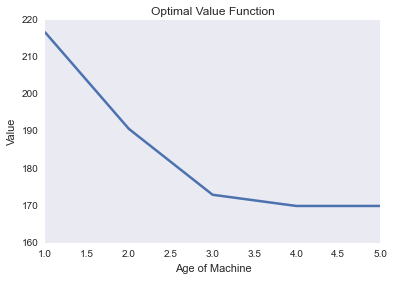

In [8]:
demo.figure('Optimal Value Function', 'Age of Machine', 'Value')
plt.plot(S, model.value)
plt.show()

### Simulate Model
The path was computed by performing a deterministic simulation of 12 years in duration using the ```simulate()``` method.

In [9]:
sinit, nyrs = S.min() - 1, 12
t = np.arange(1 + nyrs)
spath, xpath = model.simulate(sinit, nyrs)

### Plot State Path
Next Figure gives the age of the asset along the optimal path. As can be seen in this figure, the asset is replaced every four years.

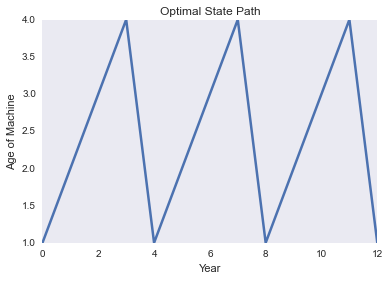

In [10]:
demo.figure('Optimal State Path', 'Year', 'Age of Machine', [0, 12])
plt.plot(t, S[spath])
plt.show()